In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from pathlib import Path

folder = Path ('C:/Upgrad Projects/ML2-M3-DecisionTree')

# read training data
bank_train = pd.read_csv(folder/"bank_train.csv")

# read test data
bank_test = pd.read_csv(folder/"bank_test.csv")

display(bank_train.head())
display(bank_test.head())

##########################
## WRITE YOUR CODE HERE ##
##########################

# create x_train and y_train
x_train = bank_train.drop(['purchased', 'id'], axis=1)
y_train = bank_train['purchased']

#####################################################
## Implement GridSearchCV to find optimal max_depth
#####################################################

# specify number of folds for k-fold CV
n_folds = 5

# specify range of the hyperparameter max_depth 
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,49,284,1,999,0,1.4,93.918,-42.7,4.957,5228.1,...,1,0,7,1,2,0,0,3,4,1
1,58,374,1,999,0,1.4,93.918,-42.7,4.963,5228.1,...,5,1,0,1,2,0,0,3,4,1
2,36,529,1,999,0,1.4,93.444,-36.1,4.965,5228.1,...,0,3,6,0,2,0,0,1,4,1
3,47,216,1,999,0,1.4,94.465,-41.8,4.961,5228.1,...,4,1,0,0,0,2,1,4,2,1
4,38,191,1,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,2,7,0,2,0,0,6,0,1


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,33,122,4,999,0,1.4,93.444,-36.1,4.963,5228.1,...,9,2,5,0,2,0,0,1,1,1
1,45,133,1,999,0,-1.8,92.893,-46.2,1.250,5099.1,...,6,0,6,0,0,2,0,6,0,1
2,39,302,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,6,1,0,0,1,6,0,1
3,49,602,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,0,0,3,0,0,0,0,3,2,1
4,24,493,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,0,2,3,1,2,2,0,3,2,1


In [8]:
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                   return_train_score = True)

In [9]:
# fit the rf model 
rf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [10]:
# store scores/results of GridSearch CV in a df
scores = rf.cv_results_
display(pd.DataFrame(scores).head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012812,0.001390,0.001291,0.000262,2,{'max_depth': 2},0.895455,0.902883,0.902883,0.907436,...,0.902580,0.003935,4,0.896774,0.903642,0.907056,0.906297,0.901782,0.903110,0.003686
1,0.017262,0.000201,0.001381,0.000195,7,{'max_depth': 7},0.904545,0.904401,0.905918,0.913505,...,0.909863,0.006484,1,0.956357,0.940061,0.938923,0.950303,0.951839,0.947497,0.006842
2,0.020131,0.000513,0.001496,0.000033,12,{'max_depth': 12},0.900000,0.907436,0.899848,0.899848,...,0.905311,0.007644,3,0.986338,0.984825,0.984825,0.984825,0.987107,0.985584,0.000960
3,0.021131,0.000378,0.001578,0.000184,17,{'max_depth': 17},0.903030,0.896813,0.911988,0.910470,...,0.908649,0.008220,2,0.993548,0.994310,0.990895,0.994310,0.991657,0.992944,0.001411


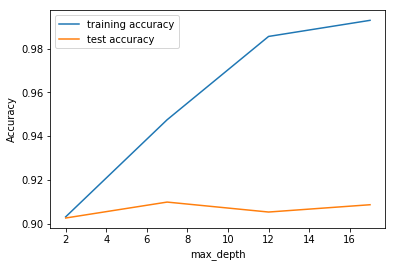

In [12]:
#####################################################
## Plot mean_train_score and mean_test_score (accuracies) on the x-axis
# and param_max_depth on the y-axis
#####################################################

plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"] , 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
#plt.savefig(folder/'max_depth.png') 

In [13]:
scores["mean_test_score"].max()

0.90986342943854326

In [14]:
# from the plot, observe the optimal value of max_depth
# and store in max_depth_optimal
max_depth_optimal = 7 

#########################################
# Build the model with optimal max_depth
#########################################
rf = RandomForestClassifier(max_depth = max_depth_optimal)
rf.fit(x_train, y_train)

## Make predictions
predictions = rf.predict(bank_test.drop(['id'], axis=1))
print(predictions[:5])

# Write columns id, predictions into the output file
d = pd.DataFrame({'id': bank_test['id'], 'bank_predicted': predictions})
display(d.head())
# Write the output
#d.to_csv('/code/output/bank_predictions.csv', sep=",")

[0 0 0 0 0]


,id,bank_predicted
0,2041,0
1,399,0
2,1400,0
3,3709,0
4,2111,0
